# Technical Assessment
### Nuno Pedrosa

## Task 3 - Model Development - Part 1

In [2]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Get Data

X_train = pd.read_csv('Data/X_train.csv')

### Exploratory data analysis (EDA)

Some early exploratory data analysis was already done in the previous section. Here, I will expand it a little bit more.

array([[<AxesSubplot:title={'center':'longevity'}>,
        <AxesSubplot:title={'center':'avg_sales_per_day'}>,
        <AxesSubplot:title={'center':'avg_days_btwn_sales'}>,
        <AxesSubplot:title={'center':'median_days_btwn_sales'}>,
        <AxesSubplot:title={'center':'max_days_btwn_sales'}>],
       [<AxesSubplot:title={'center':'month_revenue_eur'}>,
        <AxesSubplot:title={'center':'year_revenue_eur'}>,
        <AxesSubplot:title={'center':'month_average_order_value'}>,
        <AxesSubplot:title={'center':'year_plat_cntry_aov'}>,
        <AxesSubplot:title={'center':'csat'}>],
       [<AxesSubplot:title={'center':'cs_tickets_good'}>,
        <AxesSubplot:title={'center':'cs_tickets_offered'}>,
        <AxesSubplot:title={'center':'cs_tickets_bad'}>,
        <AxesSubplot:title={'center':'total_tickets'}>,
        <AxesSubplot:title={'center':'platform_c44577a5b4c0036fe1ec82c04bfa87c6'}>],
       [<AxesSubplot:title={'center':'market_country_3302c92812d6248fed26ac6bbd25521

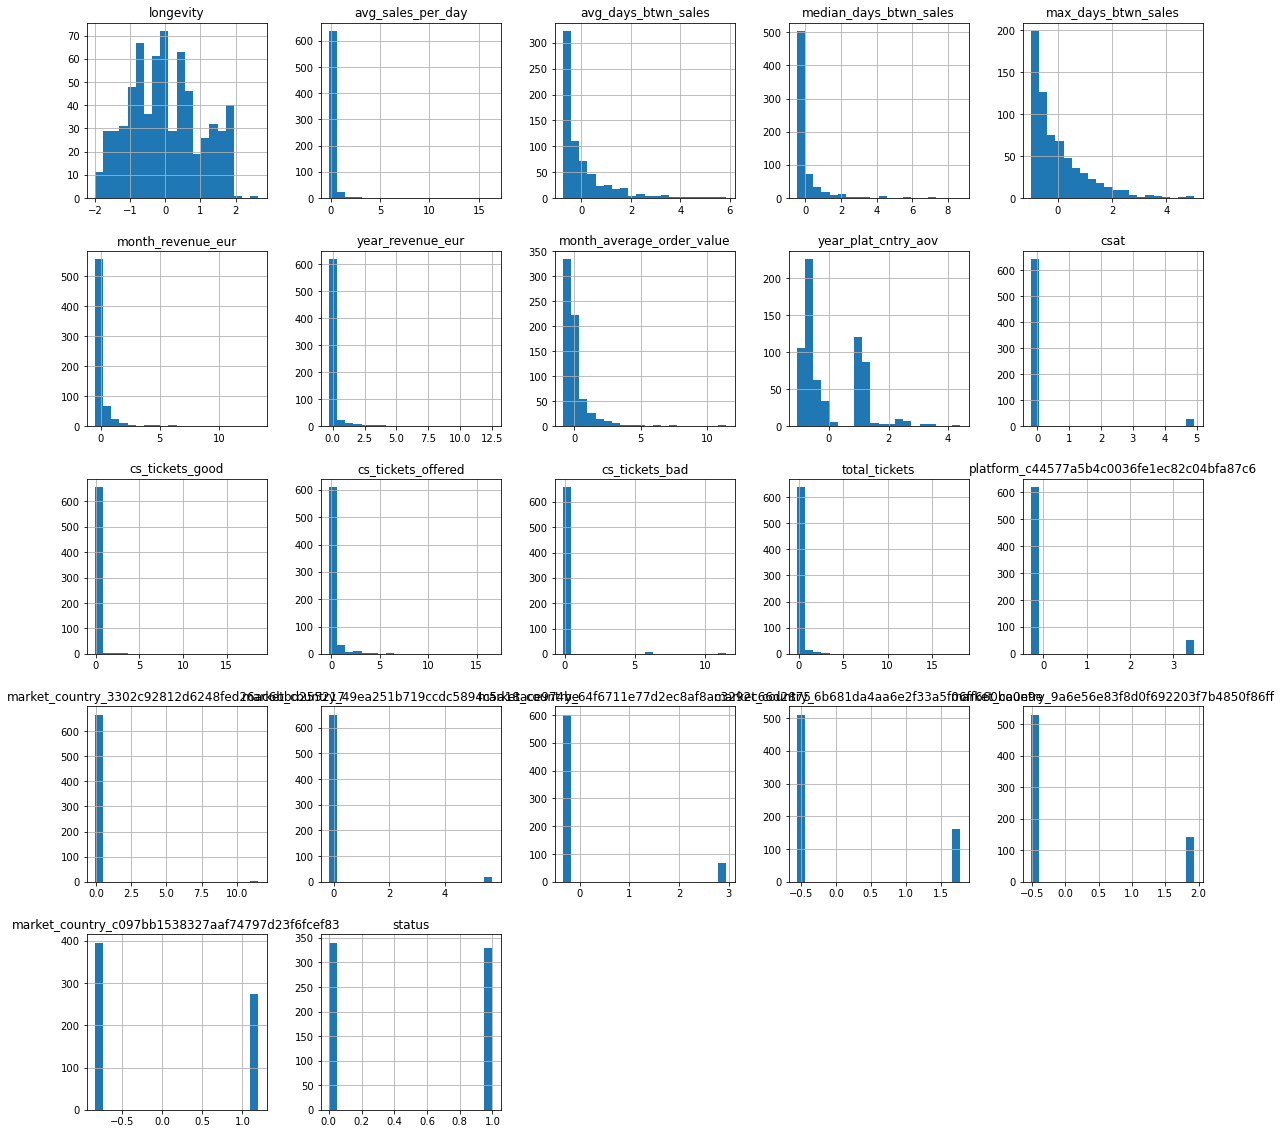

In [19]:
X_train.hist(bins=20,  figsize=(20, 20))

The distribution of the variables, except for longevity and some market_country variables, is highly skewed to the left. This indicates that our data could have benefited from normalization to be able to do some statistical tests.

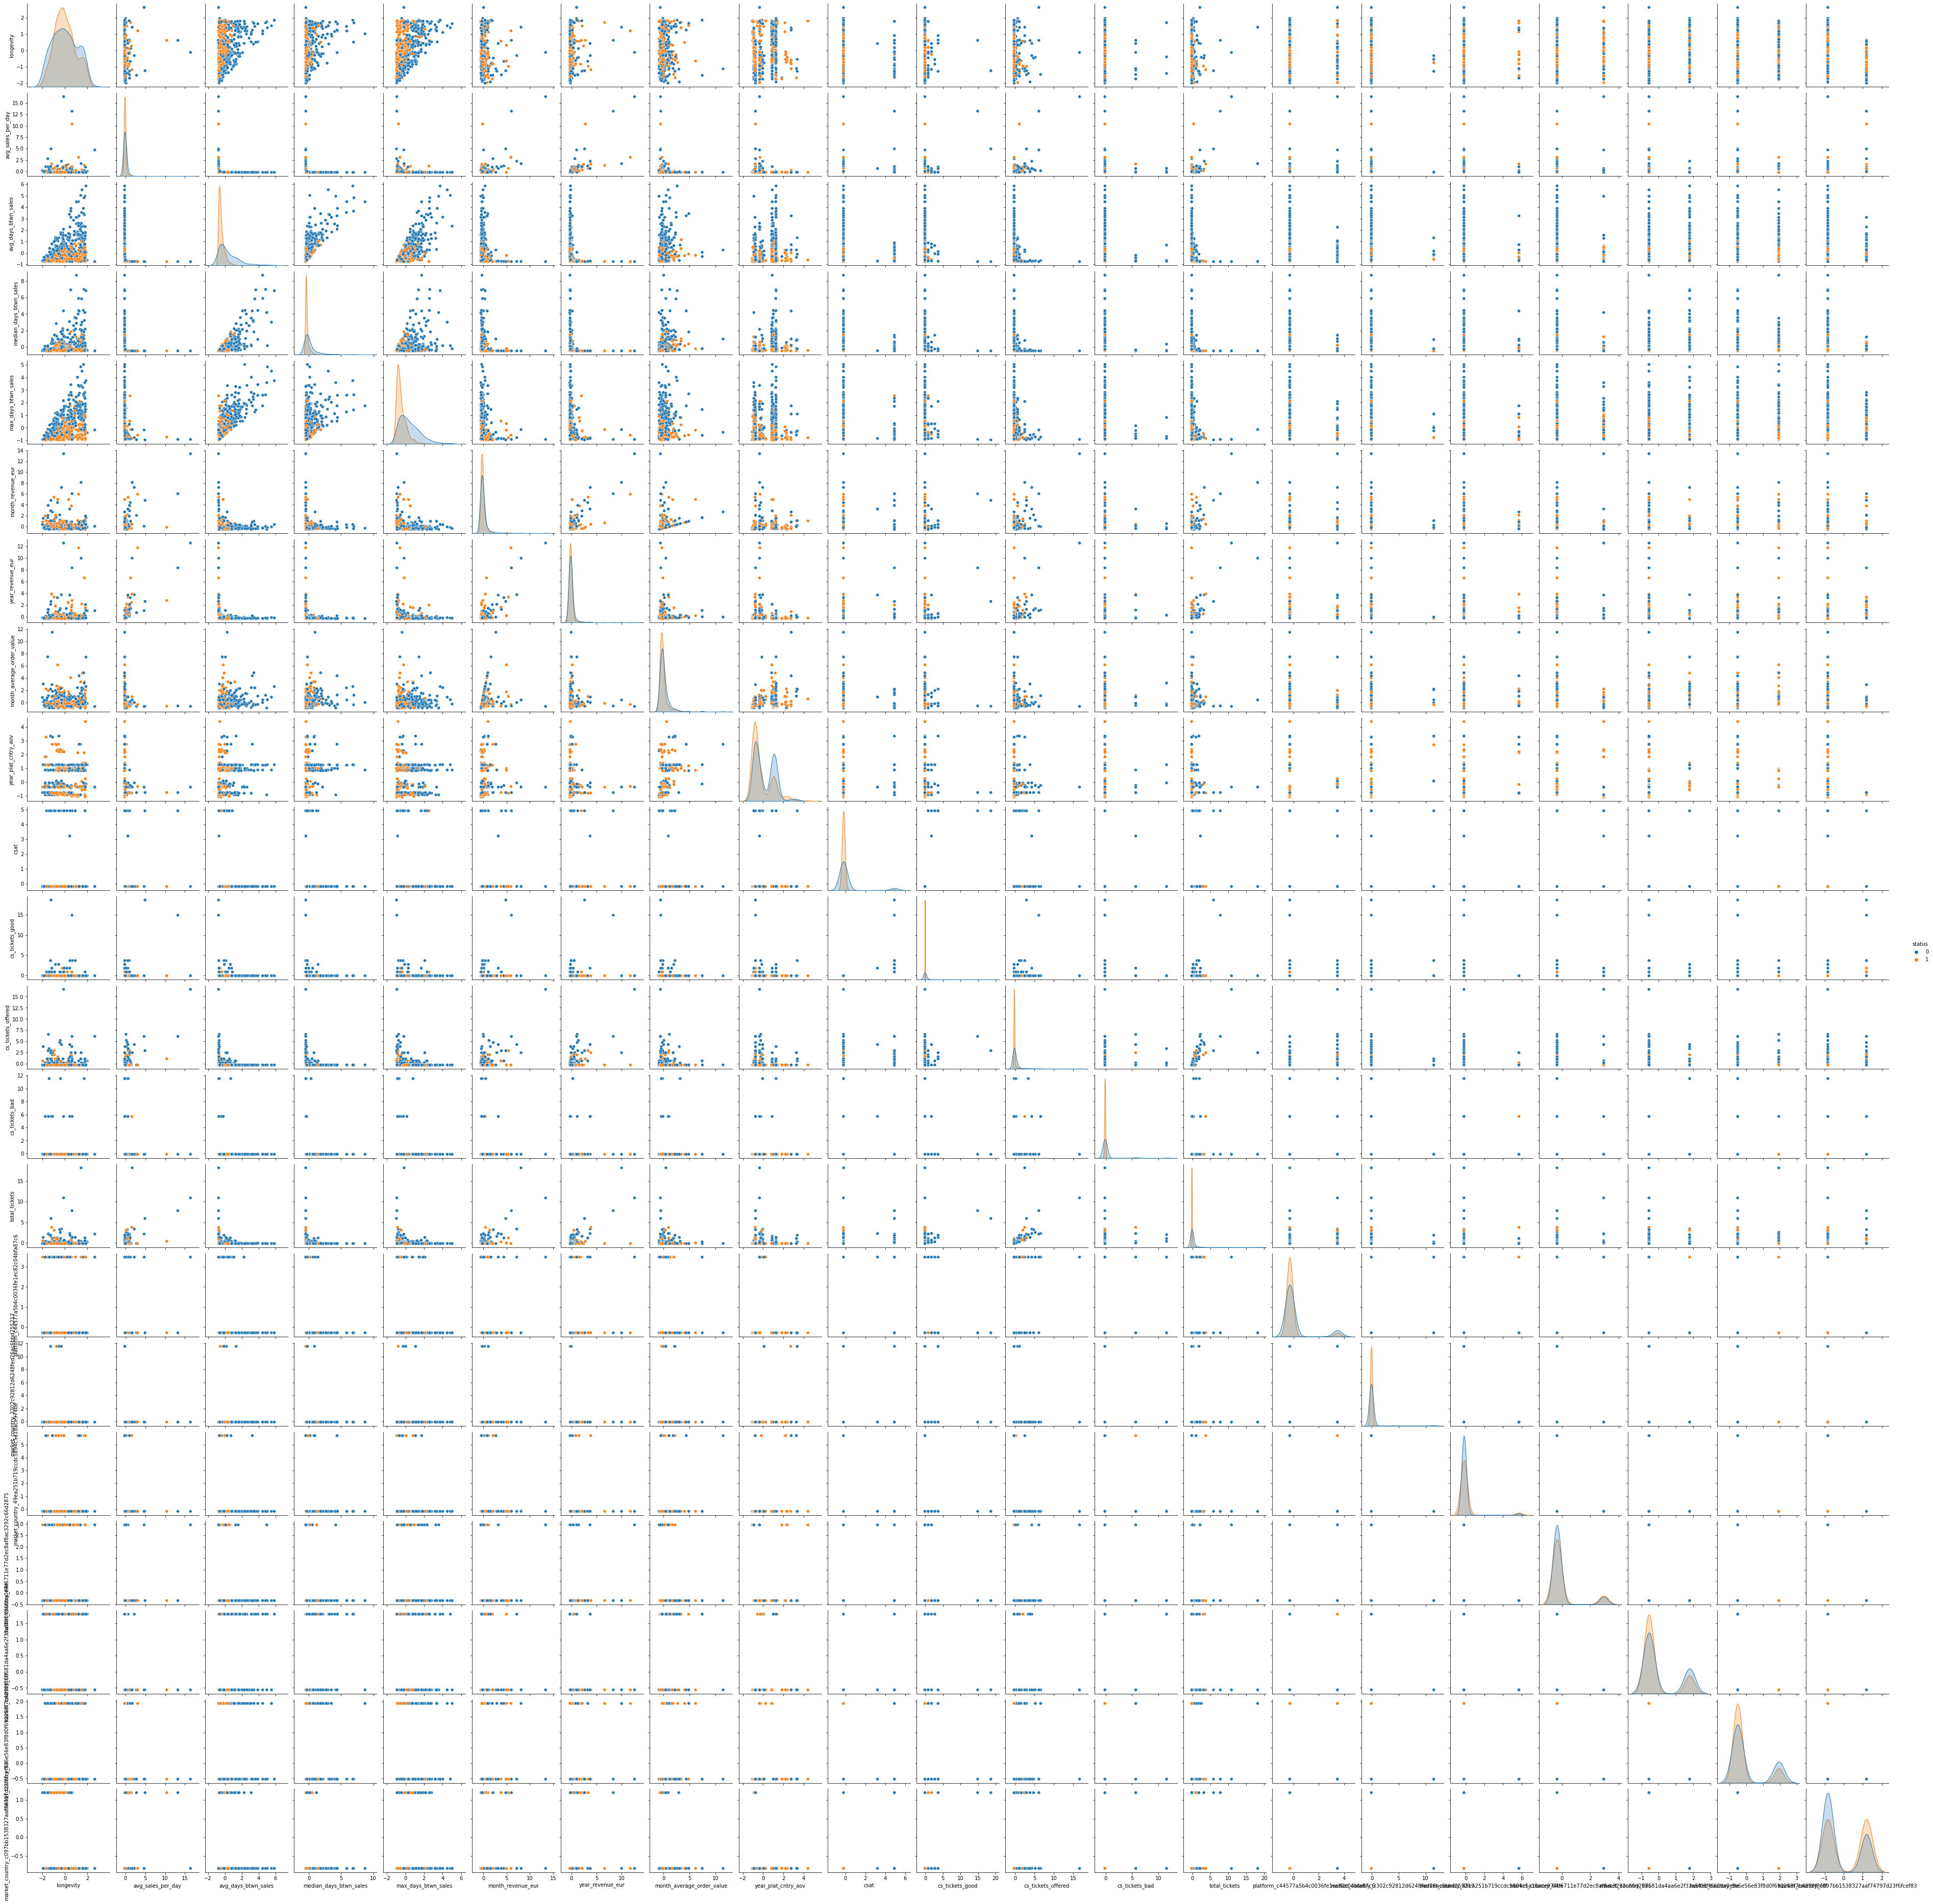

In [24]:
sns.pairplot(X_train, hue="status")

This histogram reveals that in some pairs of variables, a clear separation between the prediction objective can be observed, while in others, identifying any distinct pattern is more challenging. One pair that demonstrates a good separation is avg_days_btw_sales and longevity (first column, third row).

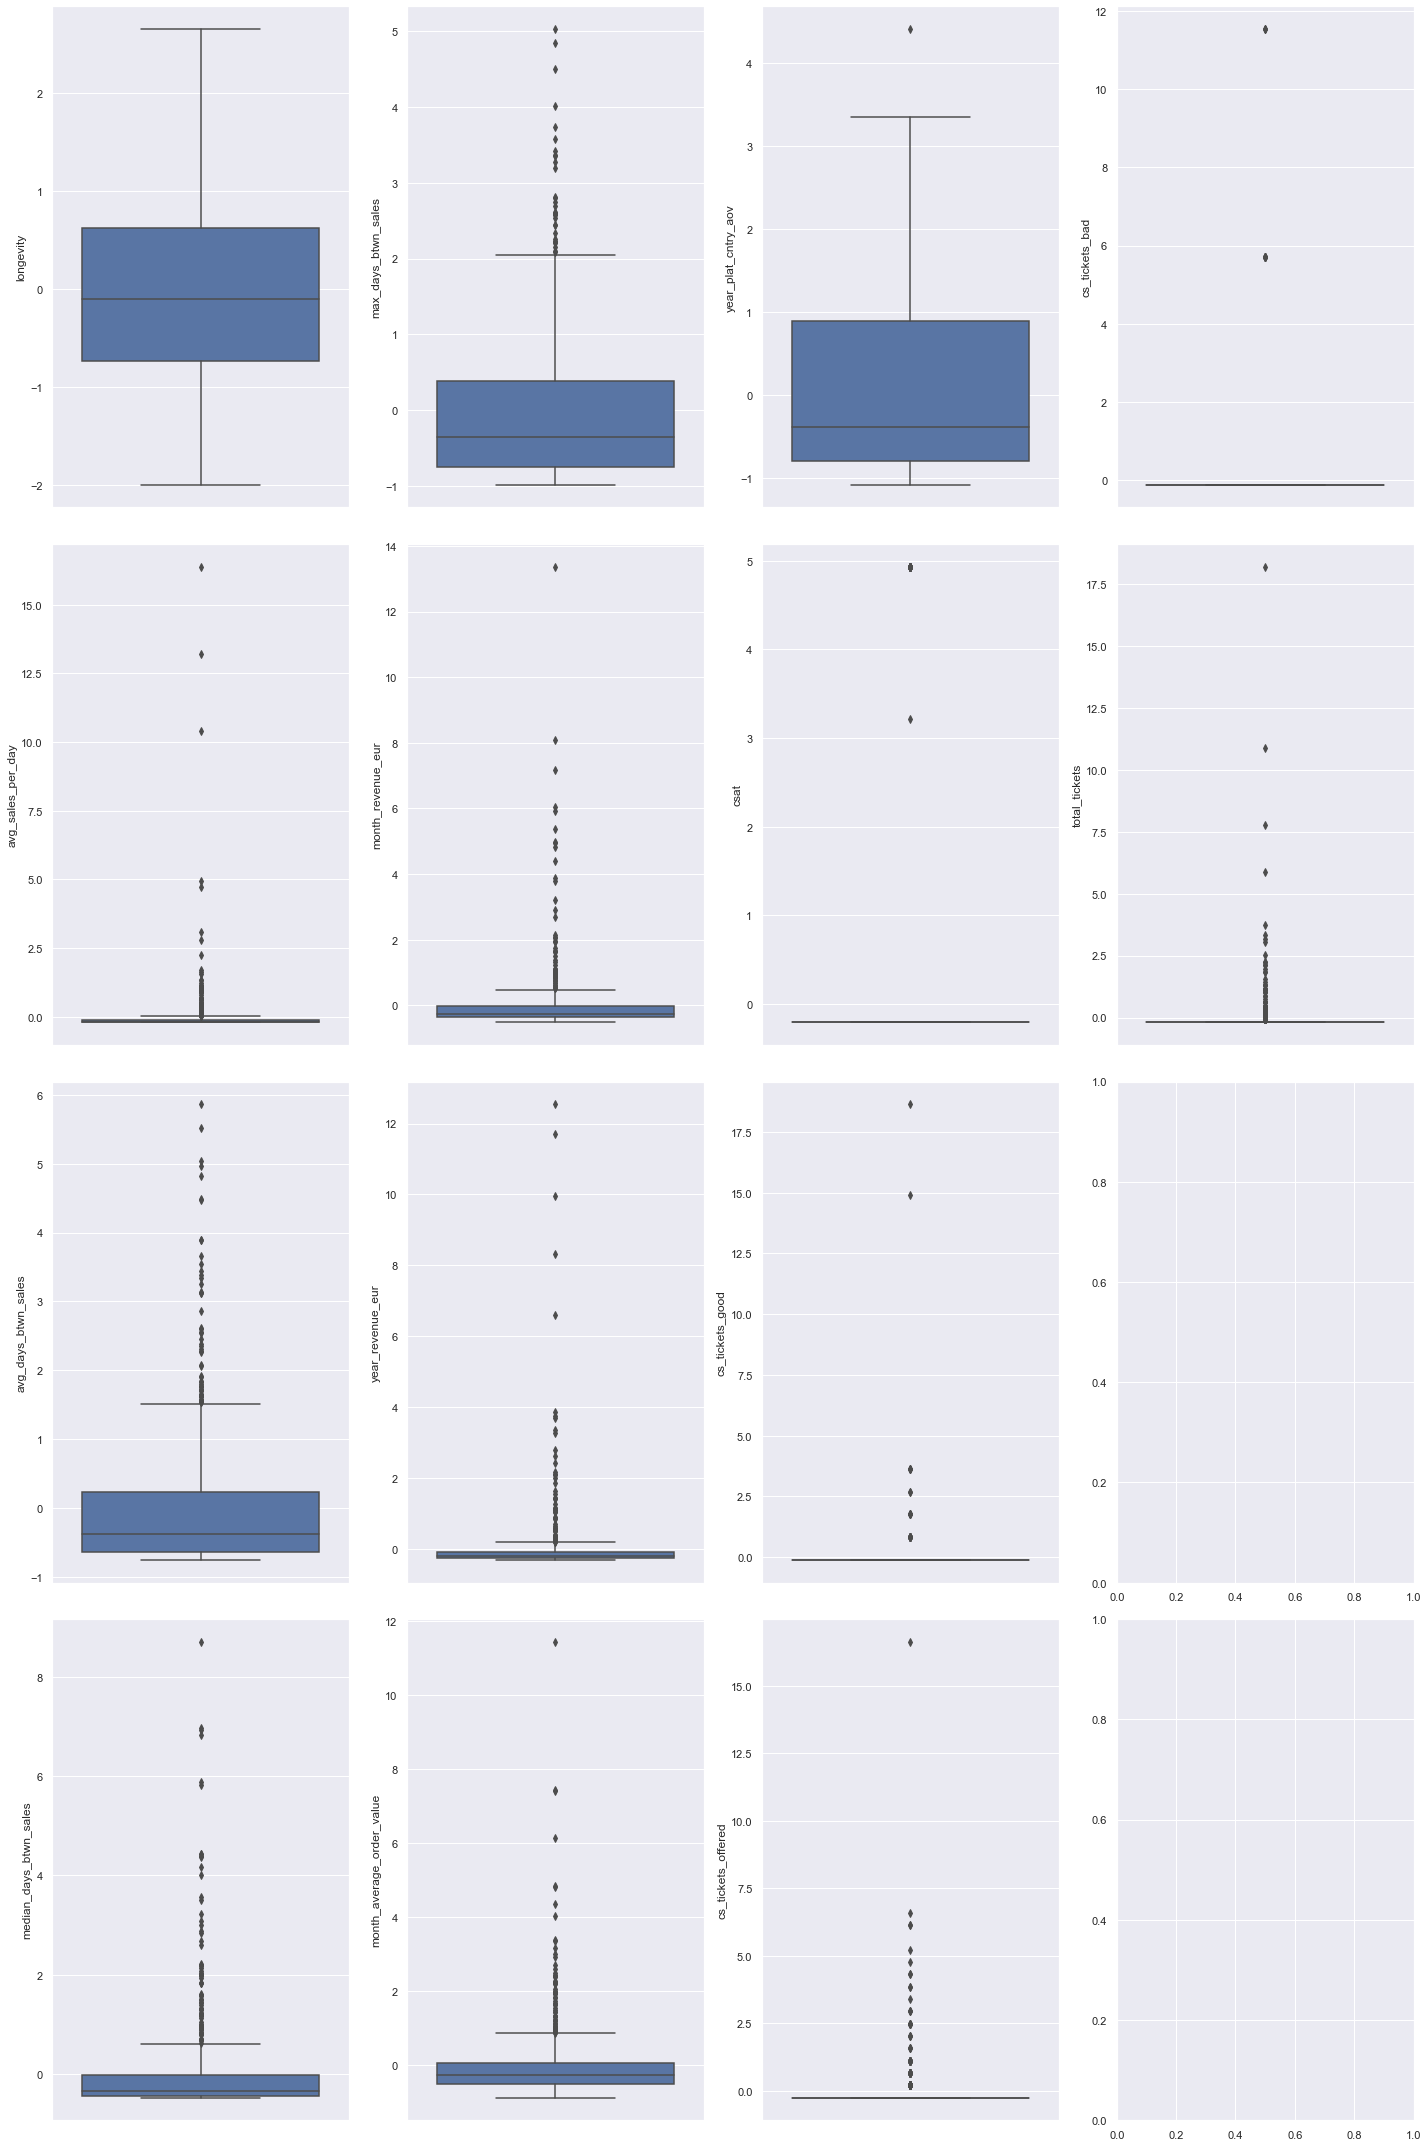

In [28]:
Continuous_Data = X_train[X_train.columns[:14]]

sns.set(rc={"figure.figsize":(20, 30)})

ax1=0
ax2=0
fig, ax = plt.subplots(4,4)

for column in Continuous_Data.columns:
    sns.boxplot(y=X_train[column], ax=ax[ax1, ax2])

    ax1 +=1
    if ax1== 4:
        ax1=0
        ax2+=1 
        
plt.tight_layout()
plt.show()

Some variables exhibit the presence of outliers. In future work, we could first apply Box-Cox normalization and then remove the detected outliers before standardization. This approach can help improve the performance of our models.

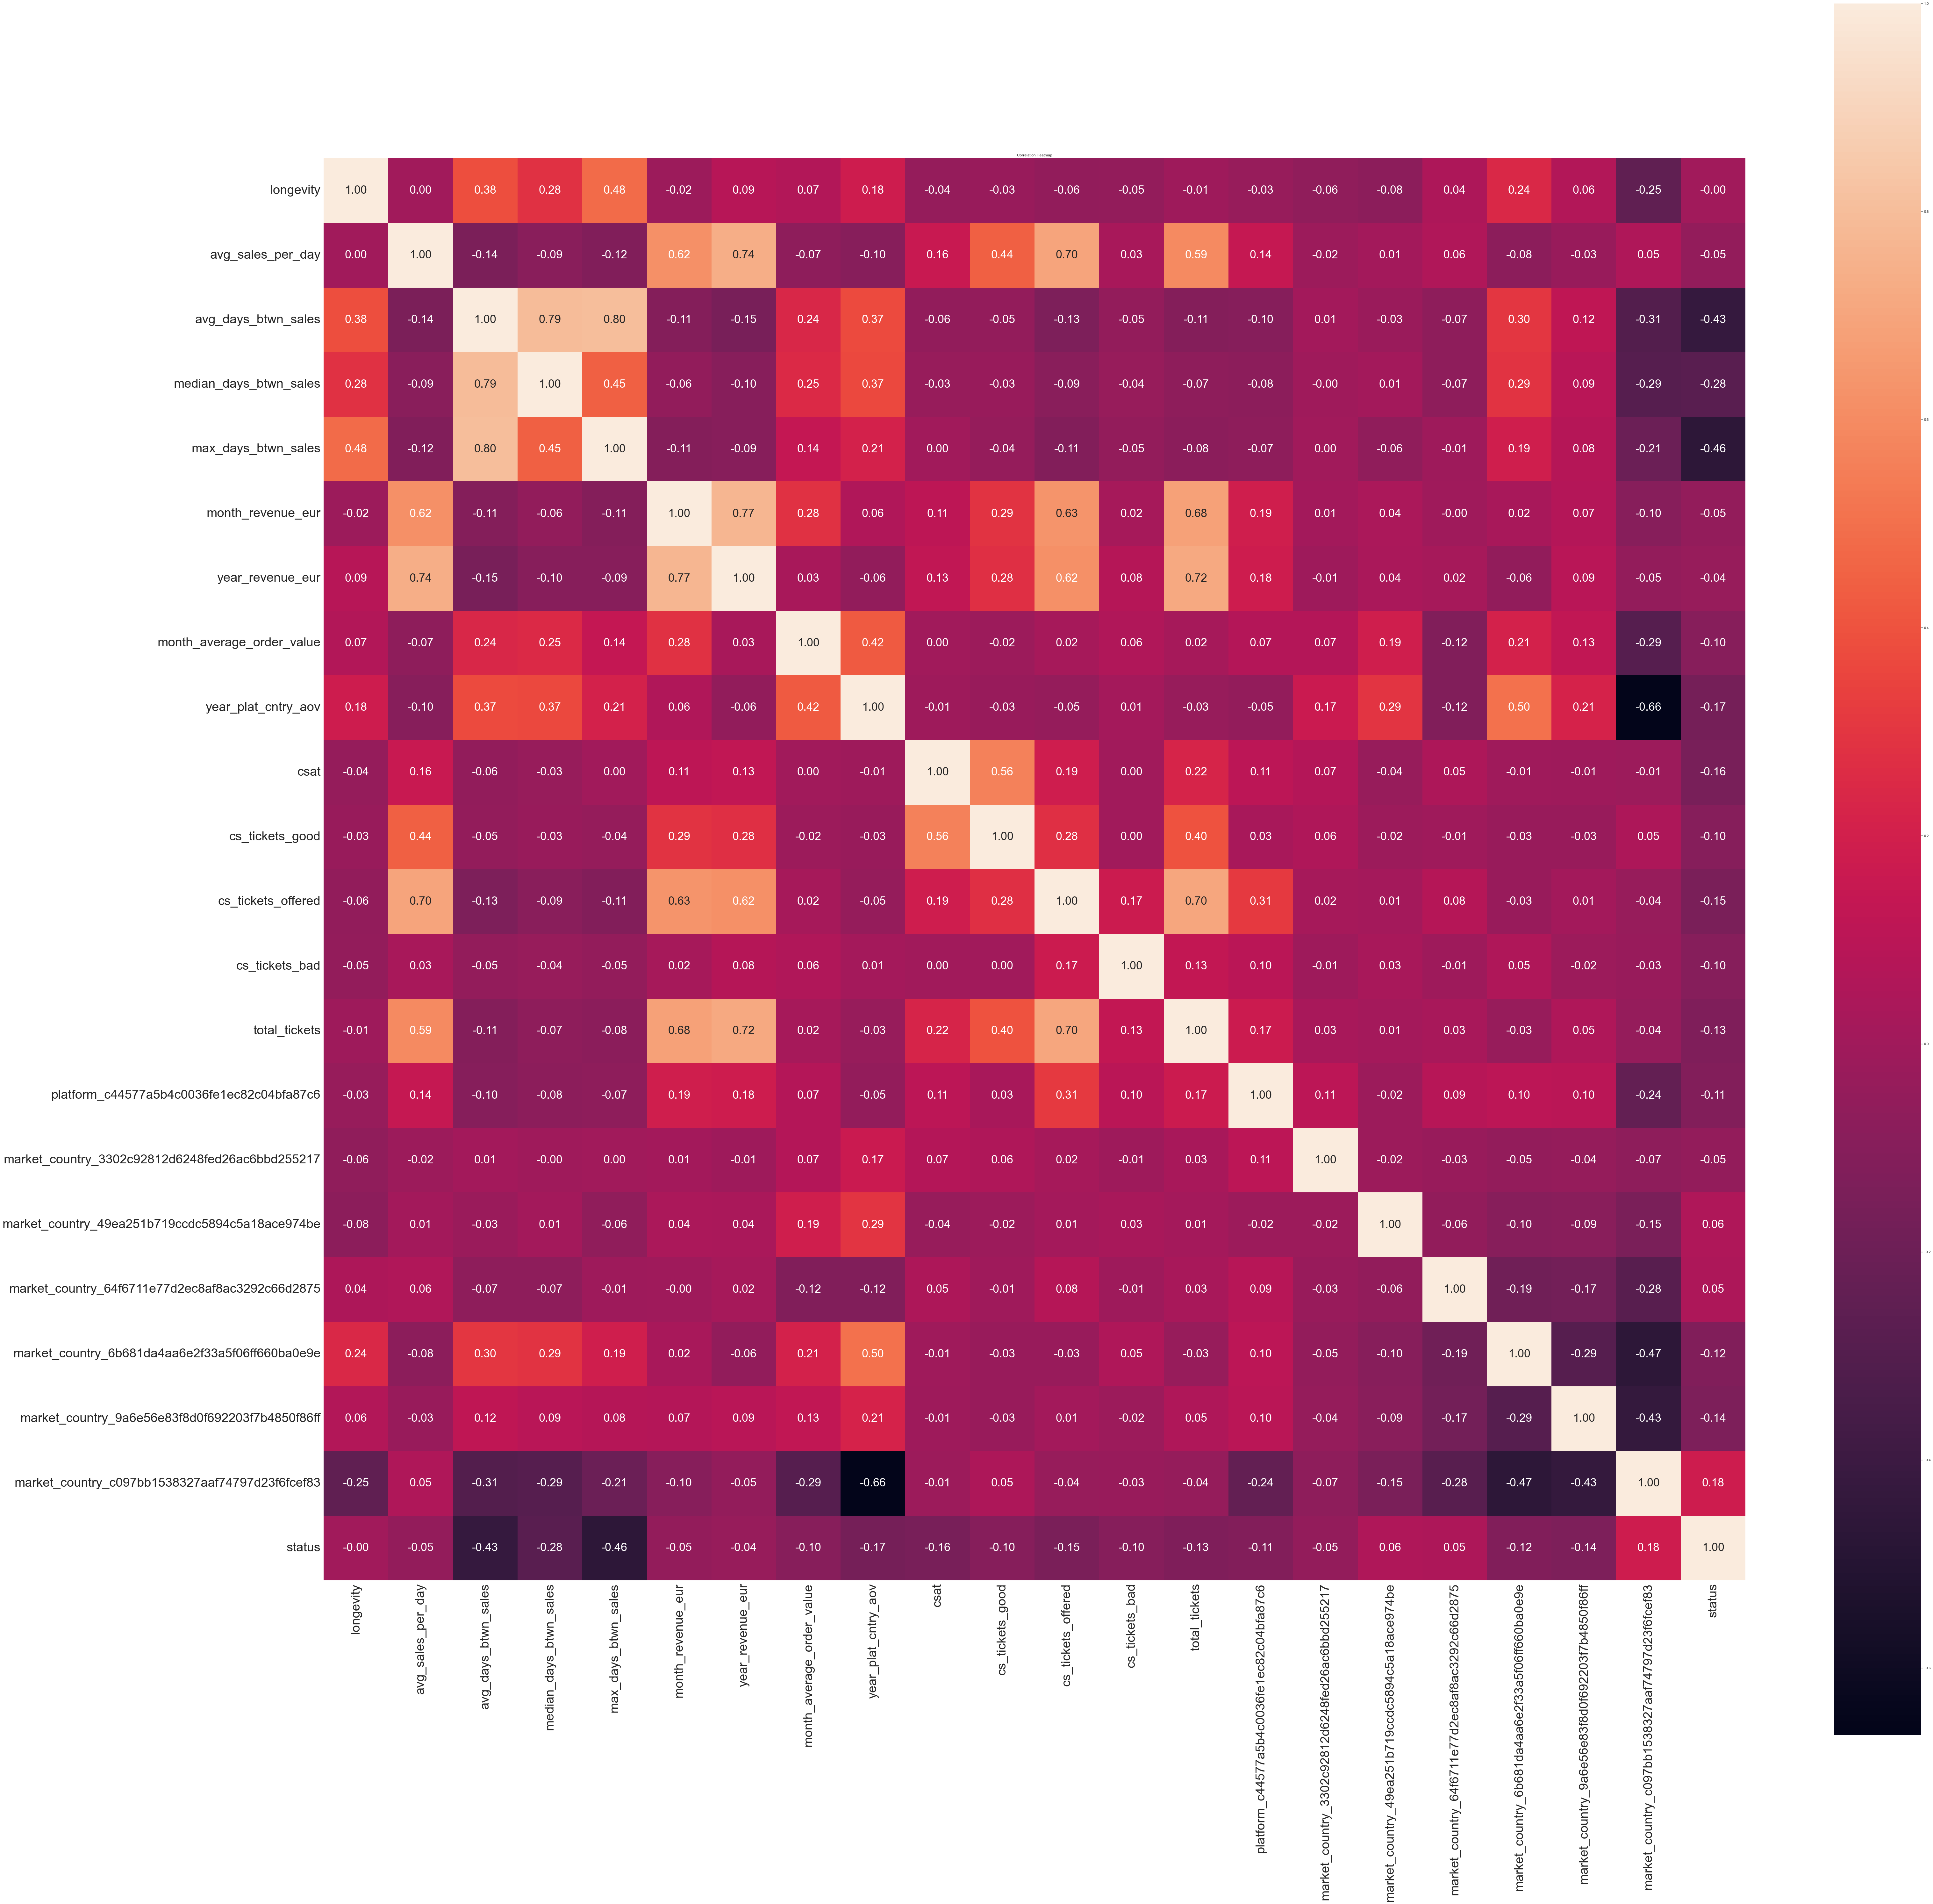

In [30]:
corr_matrix = X_train.corr()

plt.figure(figsize=(100,100))
plt.title('Correlation Heatmap')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black',  annot_kws={"size": 36})
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)           
plt.show() 

In this correlation matrix, we also find the variable status. We see two variables that have a strong relationship with status: avg_days_between_sales and max_days_between_sales.